In [1]:
%load_ext autoreload
%autoreload 2

import wikipedia # used for search of terms, provides: DisambiguationError

import wikipediaapi # used because can get categorymembers in a given category
wiki_wiki = wikipediaapi.Wikipedia('en')
# Might be able to use pywikibot for everything, or at least more
# https://stackoverflow.com/questions/71023854/how-to-find-subcategories-and-subpages-on-wikipedia-using-pywikibot
import pywikibot as pw # used to get AND filter hidden categories for an article

import graphviz

import stanza
stanza.download('en') # download English model

!jupyter nbextension install --py widgetsnbextension
!jupyter nbextension enable --py widgetsnbextension

nlp = stanza.Pipeline(lang='en', processors='tokenize,lemma,pos,depparse')

# https://www.sbert.net/docs/pretrained_models.html
from sentence_transformers import SentenceTransformer, util
#model = SentenceTransformer('all-MiniLM-L12-v2')
model = SentenceTransformer('all-MiniLM-L6-v2')

import numpy as np
import pickle

import datetime as dt

import re
import requests
import time
from collections import Counter
from os.path import exists as file_exists
 

2022-04-23 04:08:38 INFO: Downloading default packages for language: en (English)...


2022-04-23 04:08:53 INFO: Finished downloading models and saved to /root/stanza_resources.
Installing /root/venv/lib/python3.7/site-packages/widgetsnbextension/static -> jupyter-js-widgets
Making directory: /usr/local/share/jupyter/nbextensions/jupyter-js-widgets/
Copying: /root/venv/lib/python3.7/site-packages/widgetsnbextension/static/extension.js -> /usr/local/share/jupyter/nbextensions/jupyter-js-widgets/extension.js
Copying: /root/venv/lib/python3.7/site-packages/widgetsnbextension/static/extension.js.map -> /usr/local/share/jupyter/nbextensions/jupyter-js-widgets/extension.js.map
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable widgetsnbextension --py
    
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/deepnote-config/jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validatin

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
# # https://pypi.org/project/Wikipedia-API/
# def print_categorymembers(categorymembers, level=0, max_level=1):
#         for c in categorymembers.values():
#             print("%s: %s (ns: %d)" % ("*" * (level + 1), c.title, c.ns))
#             if c.ns == wikipediaapi.Namespace.CATEGORY and level < max_level:
#                 print_categorymembers(c.categorymembers, level=level + 1, max_level=max_level)

In [5]:

# search_term = "Squid Game"

# search_results = wikipedia.search(search_term)
# print(search_results[:10])

In [6]:
# print(search_results)
# #https://github.com/goldsmith/Wikipedia/issues/295

# first_search_term = search_results[0]

# #https://github.com/goldsmith/Wikipedia/issues/295
# try:
#     page = wikipedia.page(first_search_term, auto_suggest=False)    
# except wikipedia.DisambiguationError:
#     print("Oops! DisambiguationError, trying next result")
#     first_search_term = search_results[1]
#     page = wikipedia.page(first_search_term, auto_suggest=False)

# # add gui for manual disambiguation
# print(page.summary)
# #print(page.categories)

['Squid Game', 'Squid (game)', 'List of Squid Game characters', 'HoYeon Jung', 'Hellbound (TV series)', 'Crab Game', 'Lee Jung-jae', 'Squids (video game)', 'Anupam Tripathi', 'Park Hae-soo']
Squid Game (Korean: 오징어 게임; RR: Ojing-eo Geim) is a South Korean survival drama television series created by Hwang Dong-hyuk for Netflix. Its cast includes Lee Jung-jae, Park Hae-soo, Wi Ha-joon, HoYeon Jung, O Yeong-su, Heo Sung-tae, Anupam Tripathi, and Kim Joo-ryoung.
The series revolves around a contest where 456 players, all of whom are in deep financial debt, risk their lives to play a series of deadly children's games for the chance to win a ₩45.6 billion (US$38 million, €33 million, or GB£29 million as of broadcast) prize. The title of the series draws from a similarly named Korean children's game. Hwang had conceived of the idea based on his own economic struggles early in life, as well as the class disparity in South Korea and capitalism. Though he had initially written it in 2009, he was

In [7]:

# # Using stanza instead of nltk to save memory
# doc = nlp(page.summary)
# first_sentence = doc.sentences[0]
# first_sentence.text

'Squid Game (Korean: 오징어 게임; RR: Ojing-eo Geim) is a South Korean survival drama television series created by Hwang Dong-hyuk for Netflix.'

In [8]:
# # print ("{:<15} | {:<10} | {:<15} ".format('Token', 'Relation', 'Head'))
# # print ("-" * 50)
  
# # # Convert sentence object to dictionary  
# #sent_dict = doc.sentences[0].to_dict()
# sent_dict = first_sentence.to_dict()

# # # iterate to print the token, relation and head
# # for word in sent_dict:
# #   print ("{:<15} | {:<10} | {:<15} "
# #          .format(str(word['text']),str(word['deprel']),\
# #           str(sent_dict[word['head']-1]['text'] \
# #           if word['head'] > 0 else 'ROOT')))

# sent_dict

[{'id': 1,
  'text': 'Squid',
  'lemma': 'Squid',
  'upos': 'PROPN',
  'xpos': 'NNP',
  'feats': 'Number=Sing',
  'head': 2,
  'deprel': 'compound',
  'start_char': 0,
  'end_char': 5},
 {'id': 2,
  'text': 'Game',
  'lemma': 'Game',
  'upos': 'PROPN',
  'xpos': 'NNP',
  'feats': 'Number=Sing',
  'head': 22,
  'deprel': 'nsubj',
  'start_char': 6,
  'end_char': 10},
 {'id': 3,
  'text': '(',
  'lemma': '(',
  'upos': 'PUNCT',
  'xpos': '-LRB-',
  'head': 4,
  'deprel': 'punct',
  'start_char': 11,
  'end_char': 12},
 {'id': 4,
  'text': 'Korean',
  'lemma': 'Korean',
  'upos': 'PROPN',
  'xpos': 'NNP',
  'feats': 'Number=Sing',
  'head': 2,
  'deprel': 'appos',
  'start_char': 12,
  'end_char': 18},
 {'id': 5,
  'text': ':',
  'lemma': ':',
  'upos': 'PUNCT',
  'xpos': ':',
  'head': 6,
  'deprel': 'punct',
  'start_char': 18,
  'end_char': 19},
 {'id': 6,
  'text': '오징어',
  'lemma': '오징어',
  'upos': 'PROPN',
  'xpos': 'NNP',
  'feats': 'Number=Sing',
  'head': 2,
  'deprel': 'appos',


In [9]:
# mvp_flag

In [10]:
# # Look for the ROOT word of the dependency tree
# # hopefully not the first wrod
# root_id = 0
# root_word = ''
# for word in sent_dict:
#     if word['head'] == 0:
#         root_id = word['id']
#         root_word = word['text']
#         break    

# print("first root id:", root_id)
# print("first root word:", root_word)

# # Lost TV series for some reason has ROOT as first word, so use what it's connected to as ROOT instead
# if root_id in [1]:
#     for word in sent_dict:
#         if (word['head'] == 1) & (word['deprel'] in ['nsubj:pass', 'parataxis']):
#             root_id = word['id']
#             root_word = word['text']
#             break

# print("new root id:", root_id)
# print("new root word:", root_word)
 

# # Get all modifiers of ROOT word, loop up to 3 times to get enough words
# all_dep_ids = []

# for i in range(3): # at most 3 loops
#     cur_dep_ids = []
#     for word in sent_dict:
#         if ((word['head'] in all_dep_ids + [root_id]) & (word['deprel'] in ['obl', 'compound','amod','nmod','conj','appos'])):
#             cur_dep_ids.append(word['id'])

#     all_dep_ids.extend(cur_dep_ids)
#     print(i, all_dep_ids)
#     if len(all_dep_ids) > 3: # bring back at least 3 words, if we have more, then they're too far away
#         break
# print(all_dep_ids)
# all_dep_ids.append(root_id)

# category_phrase_dict = dict()
# for word in sent_dict:
#     if (word['id'] in all_dep_ids):
#         category_phrase_dict[word['id']] = (word['text'], word['deprel'])

# print(category_phrase_dict)

# category_phrase = []
# for k,v in category_phrase_dict.items():
#     category_phrase.append(v[0])

# print('category_phrase:', category_phrase)
# index_root_word = category_phrase.index(root_word)
# category_phrase = category_phrase[:index_root_word+1]

# category_phrase

# # lop off everything after the root word - didn't work well, pros and cons


first root id: 22
first root word: series
new root id: 22
new root word: series
0 [18, 20, 21]
1 [18, 20, 21, 17, 18, 19, 20, 21]
[18, 20, 21, 17, 18, 19, 20, 21]
{17: ('South', 'compound'), 18: ('Korean', 'amod'), 19: ('survival', 'compound'), 20: ('drama', 'compound'), 21: ('television', 'compound'), 22: ('series', 'root')}
category_phrase: ['South', 'Korean', 'survival', 'drama', 'television', 'series']


['South', 'Korean', 'survival', 'drama', 'television', 'series']

In [13]:
# sent_dict

[{'id': 1,
  'text': 'Squid',
  'lemma': 'Squid',
  'upos': 'PROPN',
  'xpos': 'NNP',
  'feats': 'Number=Sing',
  'head': 2,
  'deprel': 'compound',
  'start_char': 0,
  'end_char': 5},
 {'id': 2,
  'text': 'Game',
  'lemma': 'Game',
  'upos': 'PROPN',
  'xpos': 'NNP',
  'feats': 'Number=Sing',
  'head': 22,
  'deprel': 'nsubj',
  'start_char': 6,
  'end_char': 10},
 {'id': 3,
  'text': '(',
  'lemma': '(',
  'upos': 'PUNCT',
  'xpos': '-LRB-',
  'head': 4,
  'deprel': 'punct',
  'start_char': 11,
  'end_char': 12},
 {'id': 4,
  'text': 'Korean',
  'lemma': 'Korean',
  'upos': 'PROPN',
  'xpos': 'NNP',
  'feats': 'Number=Sing',
  'head': 2,
  'deprel': 'appos',
  'start_char': 12,
  'end_char': 18},
 {'id': 5,
  'text': ':',
  'lemma': ':',
  'upos': 'PUNCT',
  'xpos': ':',
  'head': 6,
  'deprel': 'punct',
  'start_char': 18,
  'end_char': 19},
 {'id': 6,
  'text': '오징어',
  'lemma': '오징어',
  'upos': 'PROPN',
  'xpos': 'NNP',
  'feats': 'Number=Sing',
  'head': 2,
  'deprel': 'appos',


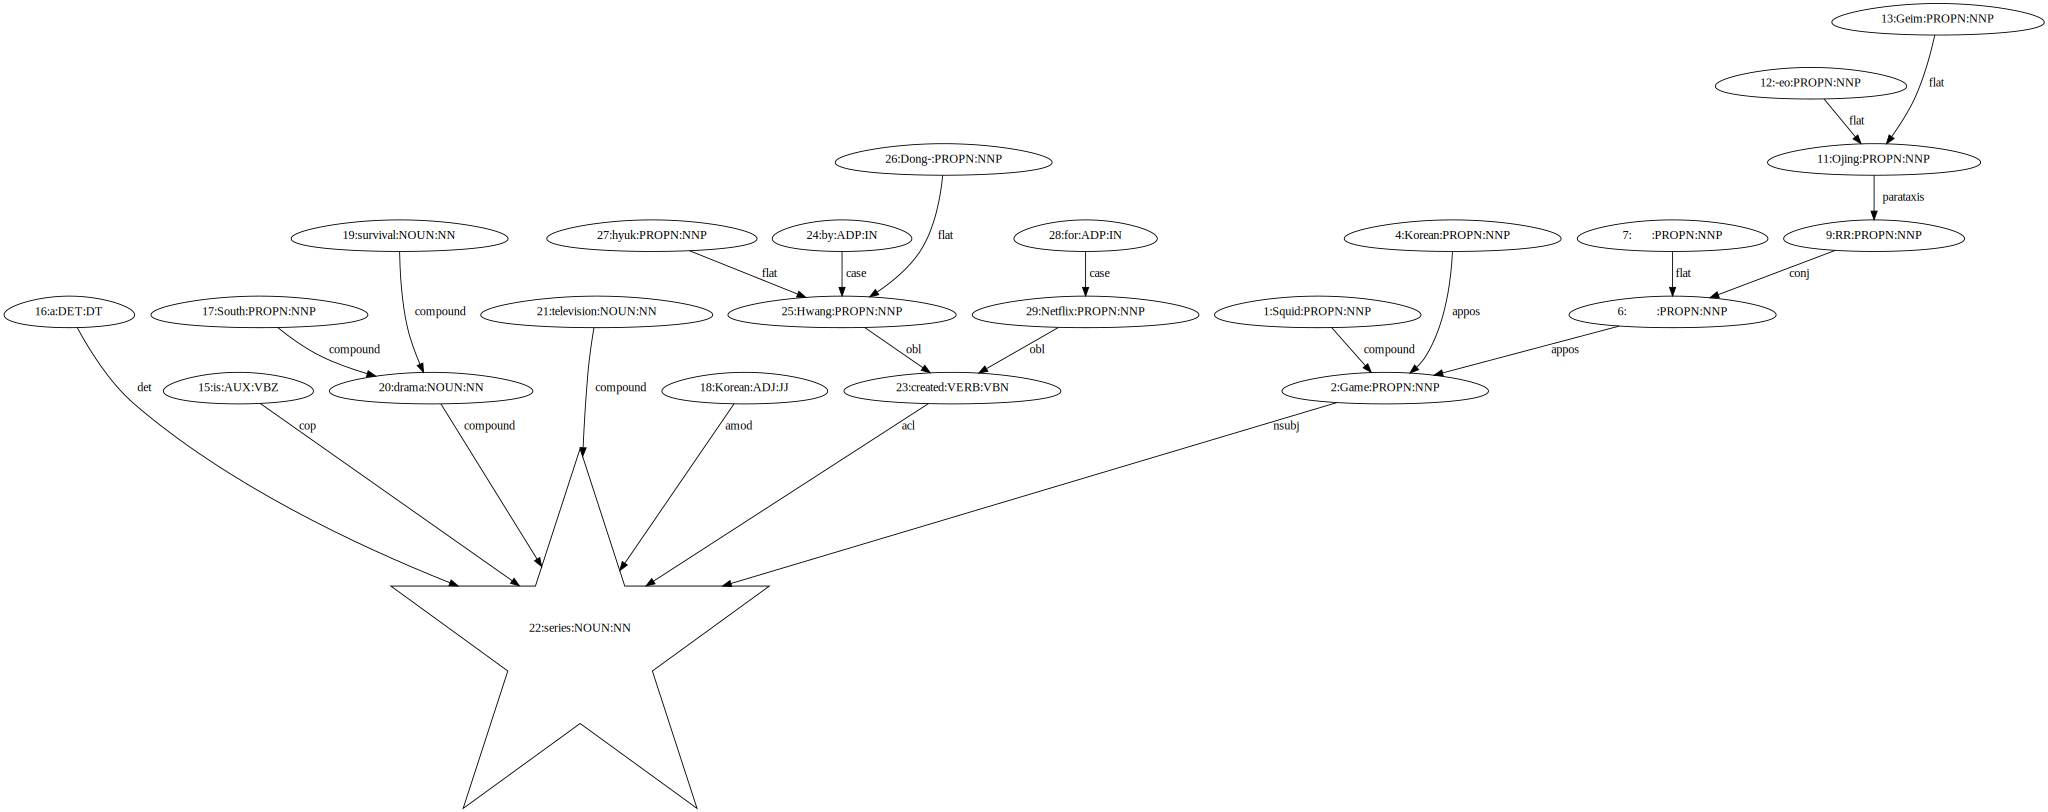

In [12]:


# id_word = {}
# root_id = 0
# for word in sent_dict:
#     if word['upos'] != 'PUNCT':
#         if word['head'] == 0:
#             root_id = str(word['id']) 
#         id_word[str(word['id'])] = str(word['id']) + ':' + word['text'] + ':' + word['upos'] + ':' + word['xpos']

# # Create Digraph object
# sent_tree = graphviz.Digraph('star_chart_' + search_term.replace(' ', '_'))

# # Add just the nodes from first traversal of dict
# for k, v in id_word.items(): 
#     # Add nodes
#     # https://graphviz.org/doc/info/shapes.html
#     if k == root_id:
#         sent_tree.node(k, v, shape='star')    
#     else:
#         sent_tree.node(k, v, shape='egg')


# # Traverse dict again to add all the relationships
# for word in sent_dict:
#     if (word['upos'] != 'PUNCT') & (str(word['head']) != '0'):        
#         sent_tree.edge(str(word['id']), str(word['head']), label=word['deprel'])

# sent_tree.format = 'png'
# sent_tree.render(directory='streamlit/images').replace('\\', '/')

# # Visualize the graph
# sent_tree.unflatten(stagger=2)



In [ ]:
def get_categories_from_wiki_article(article):
    # use pywikibot because it can filter hidden 'meta' categories that aren't needed
    # https://stackoverflow.com/questions/54526821/how-to-identify-wikipedia-categories-in-python
    site = pw.Site("en", "wikipedia")
    non_hidden = [
        cat.title()[:]
        for cat in pw.Page(site, article).categories()
        if 'hidden' not in cat.categoryinfo
    ]
    
    return(non_hidden)

#get_categories_from_wiki_article('The Avengers')

In [ ]:
def get_best_categories_for_term(wiki_term, wiki_cats, nlp_cat_phrase):
    # remove parens and anyting inside them
    wiki_term = re.sub(r'\([^)]*\)', '', wiki_term)
    print('wiki_cats:', wiki_cats)
    print('')

    # https://stackoverflow.com/questions/65199011/is-there-a-way-to-check-similarity-between-two-full-sentences-in-python
    rem_term_cats = [' '.join([wiki_term])] + wiki_cats
    rem_first = model.encode(rem_term_cats)

    print("Remove wiki-cats too close to actual term(first term)")
    print(rem_term_cats)
    cos_remove = util.pytorch_cos_sim(rem_first, rem_first)[0].numpy()
    print(cos_remove)
    rem_idx = np.where(cos_remove > .7)[0]
    #because first item is our search term here, but we need to remove items from wiki_cats, so subtract 1
    rem_idx_from_wiki_cats = rem_idx[1:]-1
    print(rem_idx_from_wiki_cats)
    rem_too_close_wiki_cats = [j for i, j in enumerate(wiki_cats) if i not in rem_idx_from_wiki_cats]
    
    if len(rem_too_close_wiki_cats) != 0:
        print('could remove categories too close and have something left.')
        wiki_cats = rem_too_close_wiki_cats
    else:
        print('left removed cats or else none would be left')
    print('after rem:', wiki_cats)


    keep_cat_cats = [' '.join(nlp_cat_phrase)] + wiki_cats
    keep_first = model.encode(keep_cat_cats)

    print("Keep wiki-cats not too far to found category(first term)")
    print(keep_cat_cats)
    keep_cos = util.pytorch_cos_sim(keep_first, keep_first)[0].numpy()
    print(keep_cos)
    keep_idx = np.where(keep_cos > .7)[0]

    keep_idx_from_wiki_cats = keep_idx[1:]-1

    print('keep idx:', keep_idx_from_wiki_cats)
    print('pre-last-filt:', wiki_cats)

    # if we got anything with a decent score, keep those, otherwise everything
    
    if len(keep_idx_from_wiki_cats) >= 2:
        wiki_cats = [j for i, j in enumerate(wiki_cats) if i in keep_idx_from_wiki_cats]
    else:
        # keep Top 5 categories if filtering doesn't return much
        cats_cos = list(zip(keep_cat_cats, keep_cos))
        top_cats_cos = sorted(cats_cos, key=lambda x: x[1], reverse=True)[1:6]
        wiki_cats = [i[0] for i in top_cats_cos]



    print('post-last-filt:', wiki_cats)

    return wiki_cats

In [ ]:
def get_first_unambiguous_wiki_term_and_page(search_term):
    search_results = wikipedia.search(search_term)

    first_wiki_term = search_results[0]    
    #https://github.com/goldsmith/Wikipedia/issues/295
    try:
        page = wikipedia.page(first_wiki_term, auto_suggest=False)    
    except wikipedia.DisambiguationError:
        print("Oops! DisambiguationError, trying next result")
        first_wiki_term = search_results[1]
        page = wikipedia.page(first_wiki_term, auto_suggest=False)

    print('first_wiki_term:', first_wiki_term)
    return first_wiki_term, page

In [ ]:
def get_stanza_dict_of_first_sentence(wiki_summary_text):
    # Using stanza instead of nltk to save memory
    doc = nlp(wiki_summary_text)
    return doc.sentences[0].to_dict()
    #first_sentence.text

In [ ]:
#first_wiki_term, wiki_page = get_first_unambiguous_wiki_term_and_page('Gamestop short squeeze')
#graph_sent(get_stanza_dict_of_first_sentence(wiki_page.summary))

In [ ]:
def get_nlp_category_phrase(wiki_page):
    
    wiki_page_text = wiki_page.summary
    # # Using stanza instead of nltk to save memory
    # doc = nlp(wiki_page_text)
    # first_sentence = doc.sentences[0]
    # #first_sentence.text
    sent_dict = get_stanza_dict_of_first_sentence(wiki_page_text)

    # Look for the ROOT word of the dependency tree
    # hopefully not the first word
    root_id = 0
    root_word = ''
    for word in sent_dict:
        if word['head'] == 0:
            root_id = word['id']
            root_word = word['text']
            break    

    # print("first root id:", root_id)
    # print("first root word:", root_word)            

    # Lost TV series for some reason has ROOT as first word
    if root_id in [1]:
        for word in sent_dict:
            if (word['head'] == 1) & (word['deprel'] in ['nsubj:pass', 'parataxis']):
                root_id = word['id']                
                root_word = word['text']
                break

    # print("new root id:", root_id)
    # print("new root word:", root_word)

    # Get all modifiers of ROOT word, loop up to 3 times to get enough words
    all_dep_ids = []

    for i in range(3):  # at most 3 loops
        cur_dep_ids = []
        for word in sent_dict:
            if ((word['head'] in all_dep_ids + [root_id]) & (word['deprel'] in ['obl', 'compound','amod','nmod','conj','appos'])):
                cur_dep_ids.append(word['id'])

        all_dep_ids.extend(cur_dep_ids)
        #print(i, all_dep_ids)
        if len(all_dep_ids) > 2:    # bring back at least 4 words, if we have more, then they're too far away
            break
    #print(all_dep_ids)
    all_dep_ids.append(root_id)

    category_phrase_dict = dict()
    for word in sent_dict:
        if (word['id'] in all_dep_ids):
            category_phrase_dict[word['id']] = word['text']

    #print(category_phrase_dict)

    nlp_category_phrase = []
    for k,v in category_phrase_dict.items():
        nlp_category_phrase.append(v)
    #print('**', search_term, '**', first_wiki_term, '**', nlp_category_phrase)
    #print(wiki_page.categories)

    # print(nlp_category_phrase)
    index_root_word = nlp_category_phrase.index(root_word)
    
    # this was an attempt to cut off the phrases at the root word, but some continue past it, iPhone for example
    #nlp_category_phrase = nlp_category_phrase[:index_root_word+1]

    print('nlp phrase:', nlp_category_phrase)
    return nlp_category_phrase


In [ ]:
def get_category_from_search_term(search_term, mvp_flag):   
    
    first_wiki_term, wiki_page = get_first_unambiguous_wiki_term_and_page(search_term)

    nlp_category_phrase = get_nlp_category_phrase(wiki_page)

    raw_wiki_cats = get_categories_from_wiki_article(first_wiki_term)

    best_wiki_cats = get_best_categories_for_term(first_wiki_term, raw_wiki_cats, nlp_category_phrase)

    expanded_year_wiki_cats = get_all_combined_wiki_cats(best_wiki_cats)

    make_white_list_cat_content_files(expanded_year_wiki_cats, first_wiki_term, mvp_flag)

    return nlp_category_phrase, expanded_year_wiki_cats, best_wiki_cats, first_wiki_term

In [ ]:
def get_wiki_wiki_pages_for_cat_members(category):
    wiki_cat = ''
    try:
        wiki_cat = wiki_wiki.page(category)        
    except requests.exceptions.SSLError:
        print("SSLError exception caught!!!!!!!!!!!!!!!")
        time.sleep(5)
        wiki_cat = wiki_wiki.page(category)
    return wiki_cat

In [ ]:
test_wiki_cat = "Category:Board games introduced in 1995"
def return_new_year_cats(wiki_cat):
    year_pattern = re.compile('(19|20)\d{2}s?')
    check_for_year = re.search(year_pattern, wiki_cat)

    curr_year = dt.datetime.now().year

    new_cat_list = []

    if check_for_year != None:
        #print('found', check_for_year.group(0), 'in category:', wiki_cat)        
        found_year = check_for_year.group(0)

        if 's' in found_year:
            new_category = wiki_cat.replace(found_year, '2020s')
            print(new_category)
            #check category exists
            pages_in_new_cat = len(get_wiki_wiki_pages_for_cat_members(new_category).categorymembers.keys())
            if pages_in_new_cat > 0:
                # add cat to existing list
                #print(pages_in_new_cat, 'exists!')
                new_cat_list.append(new_category)
        else:
            for pot_year in [str(x) for x in [curr_year - i for i in range(5)]]:
                
                #print(pot_year)
                new_category = wiki_cat.replace(found_year, pot_year)
                #check category exists
                pages_in_new_cat = len(get_wiki_wiki_pages_for_cat_members(new_category).categorymembers.keys())
                if pages_in_new_cat > 0:
                    # add cat to existing list
                    #print(pages_in_new_cat, 'exists!')
                    new_cat_list.append(new_category)
                

    return new_cat_list

return_new_year_cats(test_wiki_cat)


found 1995 in category: Category:Board games introduced in 1995


['Category:Board games introduced in 2020',
 'Category:Board games introduced in 2019',
 'Category:Board games introduced in 2018']

In [ ]:
def expand_years_in_cats_to_modern(list_wiki_cats):
    new_year_cats_to_add = []
    # SSLError: HTTPSConnectionPool(host='en.wikipedia.org', port=443)

    for cat in list_wiki_cats:    
        #print("****", cat)
        try:
            new_year_cats_to_add.append(return_new_year_cats(cat))

        except requests.exceptions.SSLError:
            print("SSLError exception caught!!!!!!!!!!!!!!!")
            time.sleep(5)
            new_year_cats_to_add.append(return_new_year_cats(cat))   

    return new_year_cats_to_add



In [ ]:
def get_all_combined_wiki_cats(list_wiki_cats):
    combined_wiki_cats = list_wiki_cats
    for year_cats in expand_years_in_cats_to_modern(list_wiki_cats):
        combined_wiki_cats = list(set(combined_wiki_cats + year_cats))
    return combined_wiki_cats



In [ ]:
def make_cat_content_dict_from_cats(wiki_cats, wiki_term, mvp_flag, max_num_wiki_articles_per_cat = 200):
    # given the filtered cats, try getting the summaries for all the pages mentioned into a dict, to pass to Kim
       
    page_cat_content_dict = dict()
    
    pkl_file_name = './output_step1/wiki_200_cat_content_' + wiki_term.replace(' ', '_') + '.pickle'

    if mvp_flag and file_exists(pkl_file_name):
        print('mvp! wikipedia cat content already exists.')
        with open(pkl_file_name, 'rb') as handle:
            page_cat_content_dict = pickle.load(handle)
    else:

        for idx, cat in enumerate(wiki_cats):
                
            page_content_dict = dict()

            try:       
                cat_page_member_keys = get_wiki_wiki_pages_for_cat_members(cat).categorymembers.keys()
            except requests.exceptions.SSLError:
                print("SSLError exception caught!!!!!!!!!!!!!!!")
                time.sleep(5)
                cat_page_member_keys = get_wiki_wiki_pages_for_cat_members(cat).categorymembers.keys()

            print(cat, idx+1, 'of', len(wiki_cats), ':', len(cat_page_member_keys))
            remove_from_pages = ['Category:', 'List of', 'Comparison of'] + [wiki_term]

            # list_of_filt_pages = [page for page in list(cat_page_member_keys)[:100] if not any(x.lower() in page.lower() for x in remove_from_pages)]
            list_of_filt_pages = [page for page in list(cat_page_member_keys) if not any(x.lower() in page.lower() for x in remove_from_pages)][:max_num_wiki_articles_per_cat]

            for filt_page in list_of_filt_pages:            
                try:                
                    page_content_dict[filt_page] = wikipedia.page(filt_page, auto_suggest=False).content                
                except wikipedia.DisambiguationError:
                    print("Oops! DisambiguationError, trying next result")                
                    continue
            
            page_cat_content_dict[cat] = page_content_dict

        print('Dumping wikipedia cat content file')
        with open(pkl_file_name, 'wb') as handle:
            pickle.dump(page_cat_content_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    return page_cat_content_dict

    # need to catch timeout here, for hitting API too often



In [ ]:
#wiki_cats

In [ ]:
def get_whitelist_dicts_by_cat(wiki_cats, wiki_term):
    #print(wiki_cats)
    # to get whitelist of all terms to search for in sentences from Kim deemed to be related to our category
    white_list_dict = dict()
    for cat in wiki_cats:
        cat_page = get_wiki_wiki_pages_for_cat_members(cat)
        print(cat)#, len(cat_page.categorymembers.keys()))
        remove_from_pages = ['Category:', 'List of', 'Comparison of'] + [wiki_term]

        list_of_filt_pages = [page for page in cat_page.categorymembers.keys() if not any(x.lower() in page.lower() for x in remove_from_pages)]

        # get rid of everything between parens like this: 'Chimera (South Korean TV series)',
        # https://stackoverflow.com/questions/29570771/re-sub-on-lists-python-3
        # https://stackoverflow.com/questions/640001/how-can-i-remove-text-within-parentheses-with-a-regex
        # https://stackoverflow.com/questions/71023854/how-to-find-subcategories-and-subpages-on-wikipedia-using-pywikibot
        
        list_of_filt_pages_nothing_in_parens = [re.sub(r'\([^)]*\)', '', i) for i in list_of_filt_pages]

        list_of_filt_pages_no_parens = [i.replace('(', '').replace(')', '') for i in list_of_filt_pages]

        list_of_filt_pages_no_parens_strip = list(set([i.strip() for i in list_of_filt_pages_no_parens]))

        white_list_dict[cat] = list_of_filt_pages_no_parens_strip

    return white_list_dict



In [ ]:
def filter_whitelist_dict_for_common_words(white_list_dict, wiki_term):
    filt_white_list = dict()
    # remove words that are too common in each category
    # rule: appear at least 10 times, and be in greater than 20% of all entries

    for k, v in white_list_dict.items(): # {category:list of titles}
        print(len(v), k, v)
        words = Counter()
        for phrase in v:
            words.update(phrase.split())
        print(words)
        
        words_to_remove = []
        for word, count in words.most_common():
            if (count < 10):
                break
            if (count/len(v) > .2):
                words_to_remove.append(word)

        print("remove:", words_to_remove)

        p = re.compile('|'.join(map(re.escape, words_to_remove))) # escape to handle metachars
        filt_white_list[k] = [' '.join(p.sub('', s).split()) for s in v]

    return filt_white_list


In [ ]:
def make_white_list_cat_content_files(wiki_cats, wiki_term, mvp_flag):
    make_cat_content_dict_from_cats(wiki_cats, wiki_term, mvp_flag)
    
    white_list_dict = get_whitelist_dicts_by_cat(wiki_cats, wiki_term)
    white_list_dict

    filt_white_list = filter_whitelist_dict_for_common_words(white_list_dict, wiki_term)

    filt_white_list

    

    with open('./output_step1/white_list_200_' + wiki_term.replace(' ', '_') + '.pickle', 'wb') as handle:
        pickle.dump(filt_white_list, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    print(wiki_term)

In [ ]:
test_terms = ['model t', 'squid game', 'lost tv', 'apple iphone', \
                'obama', 'trump', 'subway tile', 'sport', 'mandalorian',\
                'gamestop', 'ps5', 'bitcoin', 'ketogenic diet',\
                'dogecoin', 'ford bronco', 'ted lasso', 'pickle ball',\
                'data science', 'crocs', 'terraforming mars', 'final fantasy',\
                'catan', 'steve jobs', 'batman', 'tesla motors', 'cronut', 'cryptocurrency',\
                'elon musk', 'beastie boys', 'birkin bag', 'Game Stop Short Squeeze', 'oxycontin', 'Virtual reality']

#term = 'Mother 3'
#mvp_flag = True

#nlp_cat_phrase, wiki_cats, init_wiki_cats, wiki_term = get_category_from_search_term(term, mvp_flag)
# # # Try search for all categories that are cosine close to search category

# make_white_list_cat_content_files(wiki_cats, wiki_term, mvp_flag)

first_wiki_term: Mother 3
nlp phrase: ['2006', 'role-playing', 'video', 'game']
wiki_cats: ['Category:2006 video games', 'Category:Brownie Brown games', 'Category:Cancelled 64DD games', 'Category:Cancelled Nintendo 64 games', 'Category:Cancelled Super Nintendo Entertainment System games', 'Category:Dinosaurs in video games', 'Category:Fiction about mind control', 'Category:Game Boy Advance games', 'Category:HAL Laboratory games', 'Category:Japan-exclusive video games', 'Category:Japanese role-playing video games', 'Category:Media containing Gymnopedies', 'Category:Mother (video game series)', 'Category:Nintendo games', 'Category:Science fantasy video games', 'Category:Science fiction comedy', 'Category:Single-player video games', 'Category:Suicide in fiction', 'Category:Vaporware video games', 'Category:Video game sequels', 'Category:Video games about psychic powers', 'Category:Video games developed in Japan', 'Category:Video games scored by Shogo Sakai', 'Category:Video games set on f

KeyboardInterrupt: 

In [ ]:
# for term in test_terms:
#     first_wiki_term, wiki_page = get_first_unambiguous_wiki_term_and_page(term)
#     print(term, ':', first_wiki_term, ':', get_nlp_category_phrase(wiki_page))

In [ ]:
# expanded_wiki_cats = 
# print(wiki_cats)

In [ ]:
##expand_years_in_cats_to_modern(wiki_cats)

In [ ]:
#%%time






CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


In [ ]:
# for k,v in page_cat_content_dict.items():
#     print(k, len(v))

In [ ]:
#wiki_cats

In [ ]:
#white_list_dict.keys()

In [ ]:
# with open('./output_step1/wiki_100summaries_' + wiki_term.replace(' ', '') + '.pickle', 'wb') as handle:
#     pickle.dump(page_summary_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# test_model = model.encode(['catan', 'wingspan', 'Bananagrams', 'missle'])

# cos_test = util.pytorch_cos_sim(test_model, test_model)[0].numpy()
# print(cos_test)
# #rem_idx = np.where(cos_remove > .7)[0]

In [ ]:
# # attempt at searching for more categories, if what we found above isn't enough
# search_results = wikipedia.search('Category:dietary therapy', results=100, suggestion=False)
# print(search_results)

In [ ]:
# wikipedia.page('List of board games', auto_suggest=False).summary

In [ ]:


# site = pw.Site("en", "wikipedia")
# print([
#     cat.title()
#     for cat in pw.Page(site, 'support-vector machine').categories()
#     if 'hidden' not in cat.categoryinfo
# ])

# p = pw.Page(site, 'support-vector machine')
# list(p.categories())

# for cat in p.categories():
#     print(cat)
#     print(cat.categoryinfo)
#     print()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=90b052a7-f47d-474e-888f-9345355cfd9a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>